In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Shear

In [5]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_45/shear_samples_452_plus.npz"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_45/shear_samples_452_minus.npz"

In [8]:
dsp = load_dataset(pfpath)
dsm = load_dataset(mfpath)

In [10]:
dsp.keys(), dsp['samples'].keys()

(dict_keys(['samples', 'truth']),
 dict_keys(['g1', 'g2', 'a_logflux', 'mean_logflux', 'mean_loghlr', 'sigma_e', 'sigma_logflux', 'sigma_loghlr']))

In [12]:
g1p = dsp['samples']['g1']
g1m = dsm['samples']['g1']
g1p.shape

(3000,)

In [15]:
g2p = dsp['samples']['g2']
g2m = dsm['samples']['g2']
g2p.shape

(3000,)

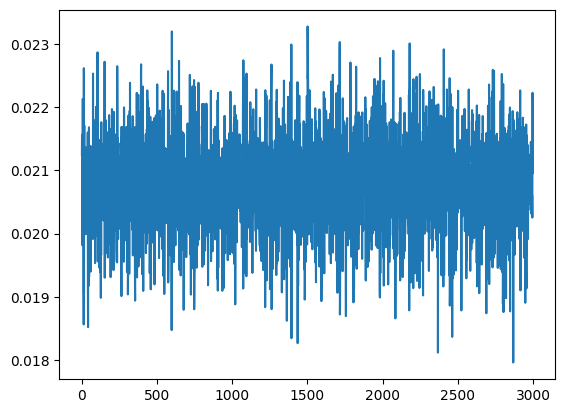

In [13]:
plt.plot(g1p)

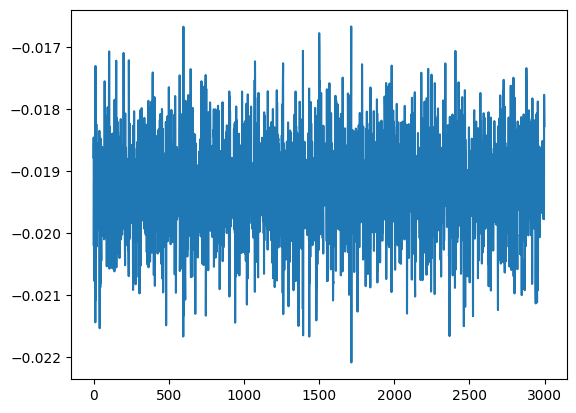

In [14]:
plt.plot(g1m)

In [16]:
m = (g1p.mean() - g1m.mean()) / 2 / 0.02 - 1
c = (g2p.mean() + g2m.mean()) / 2
m, c

(np.float64(0.00034994399270038556), np.float64(-0.0007369553584269479))

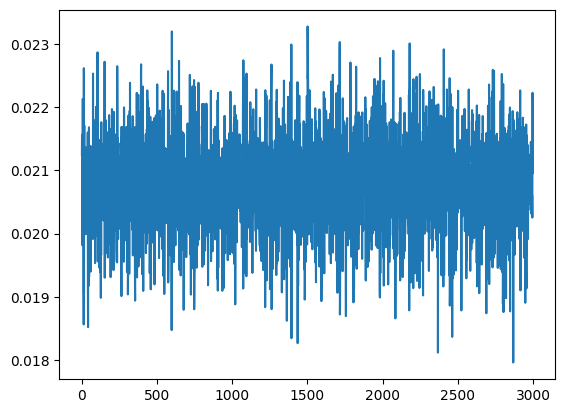

In [26]:
# trace plots of other parameters
plt.plot(dsp['samples']['g1'])

# Alternative method of estimating errors

In [76]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [77]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_45/g_samples_454_errs.npz"

In [78]:
ds = load_dataset(fpath)

In [80]:
gps = ds['gp']
gps.shape

(500, 1000, 2)

In [81]:
gms = ds['gm']
gms.shape

(500, 1000, 2)

In [82]:
ms = (gps.mean(1)[:, 0] - gms.mean(1)[:, 0]) / 2/ 0.02  - 1
cs = (gps.mean(1)[:, 0] + gms.mean(1)[:, 0]) / 2
ms.shape, cs.shape

((500,), (500,))

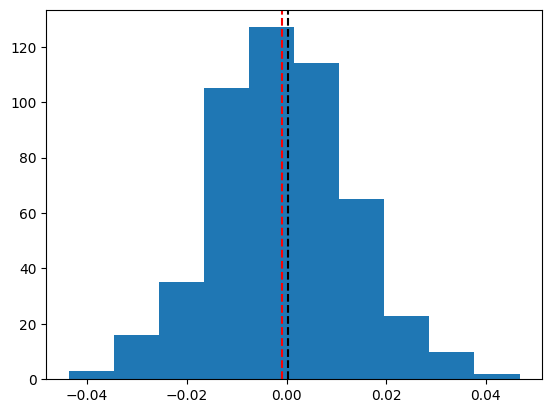

In [84]:
plt.hist(ms)
plt.axvline(m, c='k', ls='--')
plt.axvline(ms.mean(), c='r', ls='--')

In [85]:
ms.mean(), m

(np.float64(-0.0008917620901997803), np.float64(0.00020468963583653021))

In [86]:
ms.std() / np.sqrt(len(ms))

np.float64(0.0006283302234058338)

In [87]:
cs.mean(), c, cs.std() / np.sqrt(len(cs))

(np.float64(0.0007240823674257005),
 np.float64(-0.0007546858863106166),
 np.float64(0.0007800139885074273))